In [3]:
from dasquakes import *
import datetime
import numpy as np

# 1. Choose the following parameters to select data to examine

In [400]:
cable='seadasn'
record_length = 10 #minutes
t0 = datetime.datetime(2022, 5, 8, 0, 1, 0)

# 2. Run the functions to return the data

In [401]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

# 3. Use $attrs$ to see the aquisition parameters

In [387]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 6000, Number of channels: 1749
Nyquist Frequency: 50.0 Hz, cable length: 11160.285674571991 m


In [388]:
start_cha = 800#350
end_cha = 1300#data.shape[1]#500

# 4. Make a simple plot of the data

In [389]:
nx = attrs['SpatialSamplingInterval']*(end_cha-start_cha)

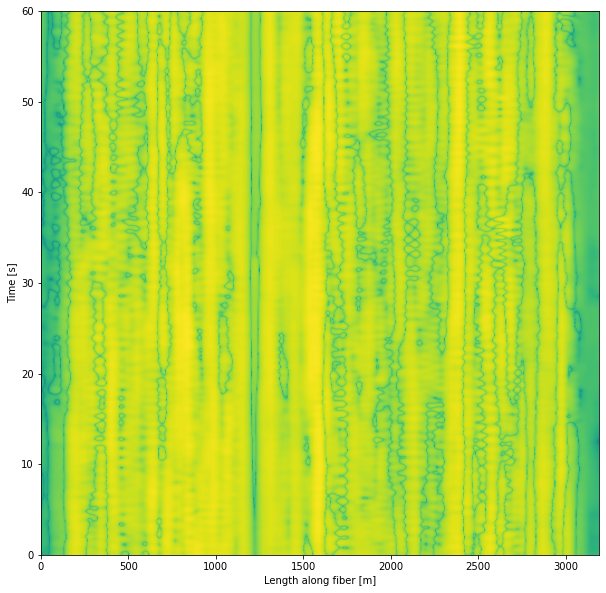

In [390]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
plt.imshow(np.log(np.abs(data_filt[:,start_cha:end_cha])),
           aspect='auto',#vmin=np.percentile(data,1),vmax=np.percentile(data,98),
           extent=[0,nx,0,nt/attrs['PulseRate']]
                )
plt.xlabel('Length along fiber [m]')
plt.ylabel('Time [s]')
plt.show()

In [391]:
import matplotlib.pyplot as plt

In [392]:
flat_data = data.flatten()

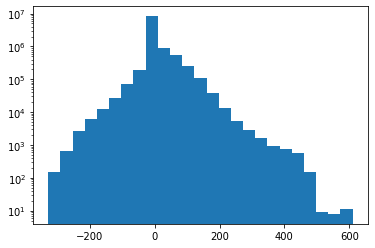

In [393]:
plt.hist(flat_data, bins=25)
plt.yscale('log')

In [405]:
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
# filter in time
[b,a]=butter(2,10,'lowpass', fs=100)
data_filt = filtfilt(b,a,data,axis=0)

#filter in space
[b,a]=butter(2,1/(100),'lowpass', fs=1/attrs['SpatialSamplingInterval'])
data_filt = filtfilt(b,a,data_filt,axis=1)


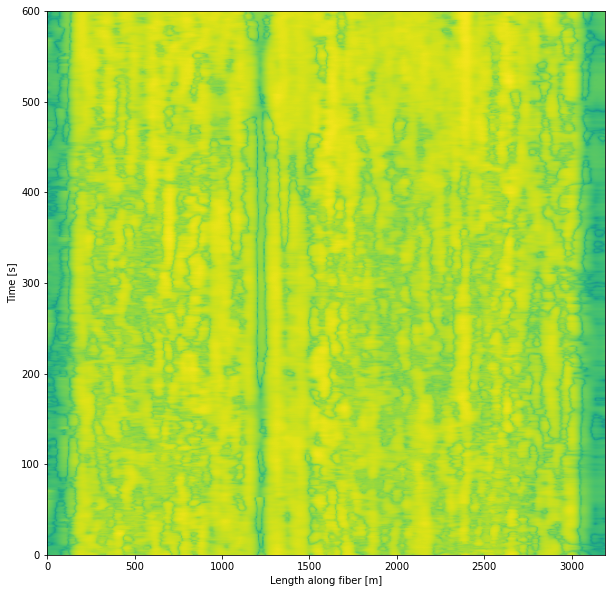

In [406]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
plt.imshow(np.log(np.abs(data_filt[:,start_cha:end_cha])),
           aspect='auto',#vmin=np.percentile(data,1),vmax=np.percentile(data,98),
           extent=[0,nx,0,nt/attrs['PulseRate']*10]
                )
plt.xlabel('Length along fiber [m]')
plt.ylabel('Time [s]')
plt.show()